In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import datetime
import math
boston = load_boston()
boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_dataset['MEDV'] =  boston.target

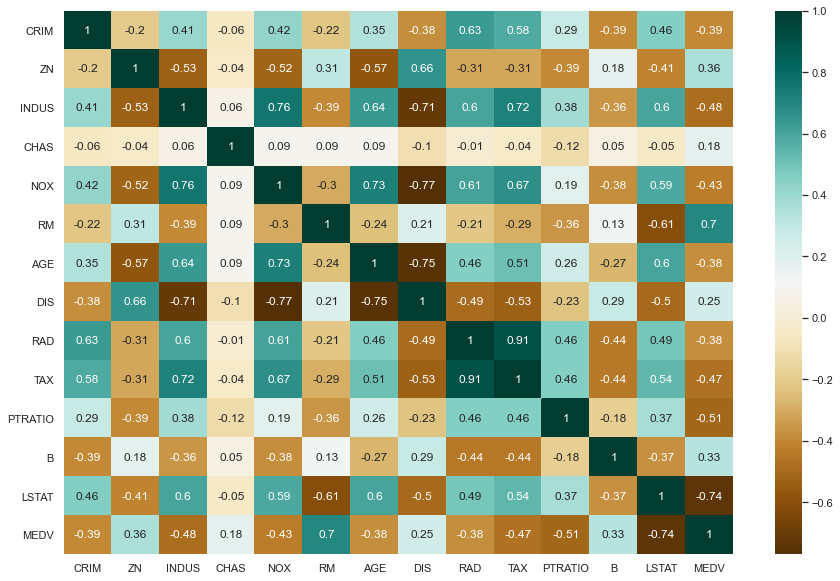

,RM,PTRATIO,LSTAT
RM,1.00,-0.36,-0.61
PTRATIO,-0.36,1.00,0.37
LSTAT,-0.61,0.37,1.00


In [2]:
corr_matrix = boston_dataset.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap="BrBG")
plt.show()

#Relevant features 
relevant_features = abs(corr_matrix["MEDV"])
relevant_features = relevant_features[relevant_features > 0.5]

boston_dataset[["RM", "PTRATIO", "LSTAT"]].corr().round(2)

In [3]:
X = boston_dataset[['PTRATIO', 'LSTAT']]
y = boston_dataset.MEDV

In [5]:
def standardize(x):
    #Standardisation of Data
    return (x - x.mean(axis=0))/ x.std(axis=0)


def build_model_data(x):
    
    num_samples = y.shape[0]
    x["INTERCEPT"] = pd.Series(np.ones(num_samples))
    return x

In [15]:
def prepare_model(X, y) :
    #Applying all previous function on dataset
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
    
    X_train = standardize(X_train)
    X_train = build_model_data(X_train)
    
    X_test = standardize(X_test)
    X_test = build_model_data(X_test)
    
    return X_train, X_test, y_train, y_test

In [8]:
def mse(e):
    """Compute the mse for the error vector e."""
    return 1/2*np.mean(e**2)



def compute_gradient(y, tx, w):
    """Compute the gradient."""
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err




def gradient_descent(y, tx, initial_w, max_iters, gamma, epsilon = 10e-5):
    #Algorithm 
    
    ws = [initial_w]
    losses = []
    w = initial_w
    prev = math.inf
    for n_iter in range(max_iters):
        
        grad, err = compute_gradient(y, tx, w) 
        loss = np.sqrt(2 * mse(err))
       
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        #Stop early if we reached convergence
        
        if(abs(loss - prev) < epsilon) :
            print("Reached Convergence !")
            break
        prev = loss
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}, w2={w2}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1], w2=w[2]))
    return losses, ws

In [16]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
# Initialization
w_initial = np.array([0, 0, 0])
# Start gradient descent.
start_time = datetime.datetime.now()
X_train, X_test, y_train, y_test = prepare_model(X, y)
gradient_losses, gradient_ws = gradient_descent(y_train, X_train, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()
#Get final weights
params = gradient_ws[-1]
#Model is y = w2 + w0*PTRATIO + w1*LSTAT
pred = params[2] + params[0]*X_test.PTRATIO + params[1]*X_test.LSTAT

Gradient Descent(0/49): loss=24.390280476265833, w0=-3.1720514378135065, w1=-4.719380335359285, w2=15.848082595870205
Gradient Descent(1/49): loss=8.889446145511963, w0=-2.946860383898434, w1=-5.34956650849908, w2=20.602507374631305
Gradient Descent(2/49): loss=6.00896521730575, w0=-2.720822650798879, w1=-5.596388942184123, w2=22.028834808259635
Gradient Descent(3/49): loss=5.664022115008237, w0=-2.590655334592269, w1=-5.72762294724185, w2=22.45673303834813
Gradient Descent(4/49): loss=5.627194654946852, w0=-2.518430214371622, w1=-5.799902810858992, w2=22.58510250737468
Gradient Descent(5/49): loss=5.6224154447486825, w0=-2.4784897966041157, w1=-5.839846038105061, w2=22.623613348082642
Gradient Descent(6/49): loss=5.62154099972602, w0=-2.4564096726674043, w1=-5.861926306226648, w2=22.63516660029503
Gradient Descent(7/49): loss=5.6213265630119436, w0=-2.444203546899753, w1=-5.874132439393993, w2=22.63863257595875
Reached Convergence !


In [17]:
exection_time_np = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time_np))
train_loss_np = gradient_losses[-1]
print("Train loss : {}".format(train_loss_np))
test_loss_np = np.sqrt(2 * mse(y_test - pred))
print("Test loss : {}".format(test_loss_np))

Gradient Descent: execution time=0.119 seconds
Train loss : 5.6212657837361535
Test loss : 6.025138142210886


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
start_time = datetime.datetime.now()
model.fit(X_train, y_train)
end_time = datetime.datetime.now()
exection_time_sk = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time_sk))
train_loss_sk = np.sqrt(2 * mse(y_train - model.predict(X_train)))
print("Train loss : {}".format(train_loss_sk))
test_loss_sk = np.sqrt(2 * mse(y_test - model.predict(X_test)))
print("Test loss : {}".format(test_loss_sk))

Gradient Descent: execution time=0.321 seconds
Train loss : 5.6212397123914855
Test loss : 6.025434421419352
